# Linear and Multiple Linear Regression

In this lab you will practice performing linear and multiple regression. To begin, import the following libraries:

In [64]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyarrow

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Then, we'll import the dataset: 

In [76]:
# Reading the dataset
df = pd.read_parquet('final_dataset.parquet')

In this part, you will generate a boxplot and remove outliers using IQR method. To begin, replace NaN values with 0 and filter the dataset to use `date`, `max_temp`, and `sm_pca`. After cleaning and filtering your dataset, generate the boxplot and remove outliers using IQR.

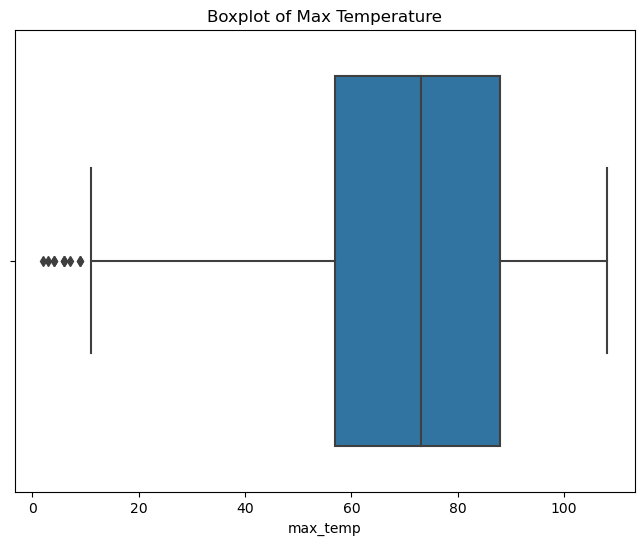

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data, handle NaNs, and filter columns (unchanged)
df = pd.read_parquet('final_dataset.parquet')
df.fillna(0, inplace=True)
df_filtered = df[['date', 'max_temp', 'sm_pca']]

# Boxplot for max_temp only
plt.figure(figsize=(8, 6))  # Adjusted figure size
sns.boxplot(data=df_filtered, x='max_temp')
plt.title('Boxplot of Max Temperature')
plt.show()

# Outlier removal function (unchanged)
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply outlier removal and update df
df = remove_outliers_iqr(df_filtered, 'max_temp')
df = remove_outliers_iqr(df, 'sm_pca')

# Calculate and print statistics (using df instead of df_cleaned)
mean_max_temp = df['max_temp'].mean()
mean_sm_pca = df['sm_pca'].mean()
min_max_temp = df['max_temp'].min()
max_sm_pca = df['sm_pca'].max()



In [118]:
assert (df.shape == (4632, 3), "Check that your dataframe is filtered correctly.")
assert (np.isclose(df['max_temp'].mean(), 72.173143)), "Check that you have removed outliers correctly for max_temp."
assert (np.isclose(df['sm_pca'].mean(), -0.258722)), "Check that you have removed outliers correctly for sm_pca."
assert (np.isclose(df['max_temp'].min(), 11.000000)), "Check that you have removed outliers correctly for max_temp."
assert (np.isclose(df['sm_pca'].max(), 2.233630)), "Check that you have removed outliers correctly for sm_pca."

Next, we'll split the data into training and testing sets before performing a linear regression using `LinearRegression()` and fitting the training data. Remember to reshape your data. 

After performing the linear regression, you should generate a graph similar to the following: 

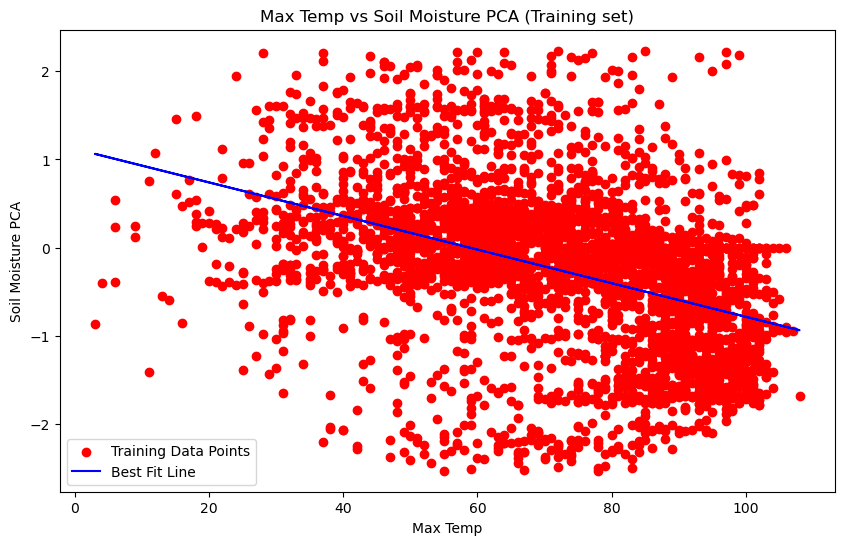


In [119]:
# Splitting data into training and test set using sklearn
X_train, X_test, y_train, y_test = train_test_split(df['max_temp'], df['sm_pca'], test_size=0.25, random_state=0)

# Looking at training data and test data

display(X_train.head())
display(y_train.head())
display(X_test.head())
display(y_test.head())

2803    66
1495    78
1973    98
1159    60
3771    98
Name: max_temp, dtype: int64

2803    1.192699
1495    0.408074
1973   -0.500562
1159   -0.393938
3771   -1.645886
Name: sm_pca, dtype: float64

394     71
593     68
1873    67
3975    44
3333    83
Name: max_temp, dtype: int64

394    -0.289785
593    -0.749500
1873    0.309108
3975    0.020986
3333   -1.529026
Name: sm_pca, dtype: float64

R-squared: 0.12067608218412873


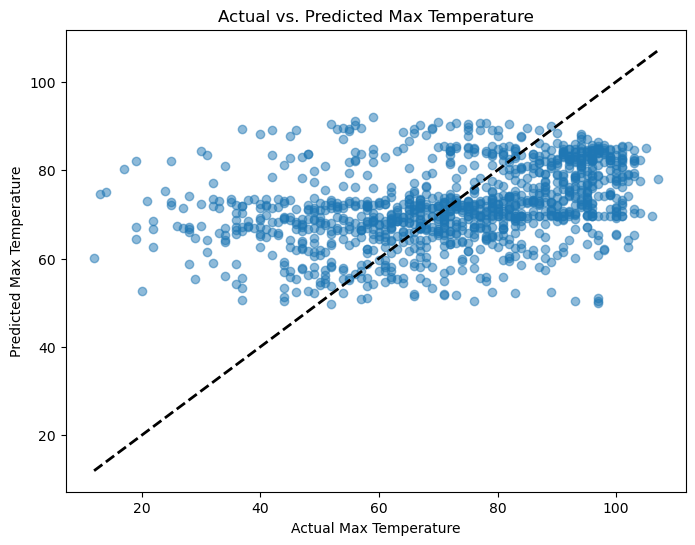

In [121]:
# your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# ... (Your data loading, cleaning, and statistics code here) ...

# Prepare data for linear regression
X = df[['sm_pca']]
y = df['max_temp']
X = X.values.reshape(-1,1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


# your code here
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")


# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Max Temperature')
plt.ylabel('Predicted Max Temperature')
plt.title('Actual vs. Predicted Max Temperature')
plt.show()

#raise NotImplementedError

#X_train = X_train
#model = model


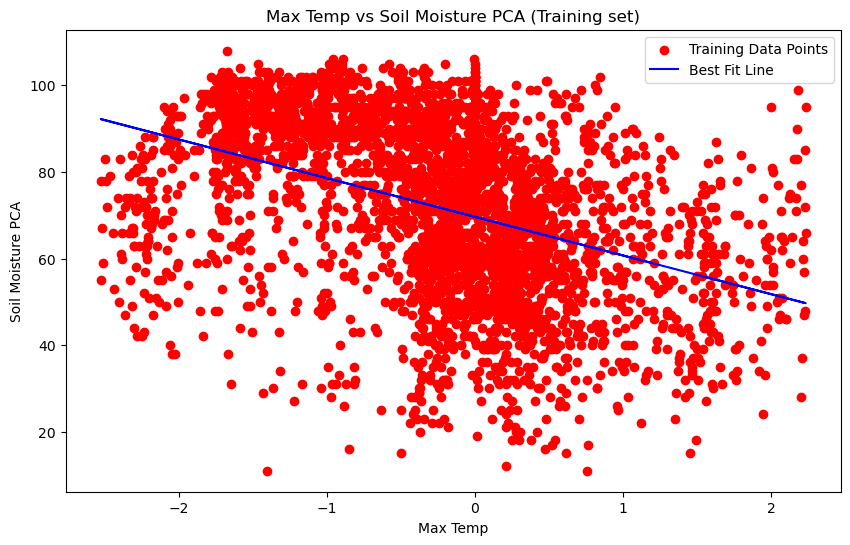

In [122]:
# Visualizing the training set results
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='red')

# Plotting the best fit line
plt.plot(X_train, model.predict(X_train), color='blue')
plt.title('Max Temp vs Soil Moisture PCA (Training set)')
plt.xlabel('Max Temp')
plt.ylabel('Soil Moisture PCA')
plt.legend(['Training Data Points', 'Best Fit Line'])
plt.show()

Finally, you will calculate the mean squared error (MSE) and the R2 score for both the training and test data. 

In [123]:
# your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# ... (Your data loading, cleaning, and statistics code here) ...

# Prepare data for linear regression
X = df[['sm_pca']]
y = df['max_temp']
X = X.values.reshape(-1, 1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# your code here
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Mean Squared Error for Training data: {mse_train}')
print(f'R2 Score for Training data: {r2_train}')
print(f'Mean Squared Error for Test data: {mse_test}')
print(f'R2 Score for Test data: {r2_test}')



Mean Squared Error for Training data: 319.9281588828578
R2 Score for Training data: 0.17656709200883003
Mean Squared Error for Test data: 339.18175139667187
R2 Score for Test data: 0.12067608218412873
